# Find the Flag
Can you guess which continent this flag comes from?
<img src="reunion.png" alt="Drawing" style="width: 300px;"/>

- What are some of the features that would clue you in? Maybe some of the colors are good indicators. 
- The presence or absence of certain shapes could give you a hint. 

#### Project Goal
In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features.

We’ll explore which features are the best to use and the best way to create your decision tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Investigate the Data

In [2]:
flags = pd.read_csv('flags.csv', header=0)
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Mainhue,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [3]:
print(flags.columns)

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')


Take a look at the Attribute Information for this dataset from [UCI’s Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Flags).

Attribute Information:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)



In [4]:
flags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        194 non-null    object
 1   Landmass    194 non-null    int64 
 2   Zone        194 non-null    int64 
 3   Area        194 non-null    int64 
 4   Population  194 non-null    int64 
 5   Language    194 non-null    int64 
 6   Religion    194 non-null    int64 
 7   Bars        194 non-null    int64 
 8   Stripes     194 non-null    int64 
 9   Colors      194 non-null    int64 
 10  Red         194 non-null    int64 
 11  Green       194 non-null    int64 
 12  Blue        194 non-null    int64 
 13  Gold        194 non-null    int64 
 14  White       194 non-null    int64 
 15  Black       194 non-null    int64 
 16  Orange      194 non-null    int64 
 17  Mainhue     194 non-null    object
 18  Circles     194 non-null    int64 
 19  Crosses     194 non-null    int64 
 20  Saltires  

## Creating Your Data and Labels

In [5]:
labels = flags['Landmass']
data = flags[['Red', 'Green', 'Blue', 'Gold','White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
               'Quarters', 'Sunstars', 'Crescent', 'Triangle']]

In [6]:
# Split the data
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

## Make and Test the Model

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(train_data, train_labels)
score = tree.score(test_data, test_labels)

score

0.4489795918367347

## Tuning the Model

In [8]:
scores = []
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)
    print(i, score)

1 0.3469387755102041
2 0.3877551020408163
3 0.5102040816326531
4 0.5510204081632653
5 0.5510204081632653
6 0.5102040816326531
7 0.42857142857142855
8 0.4489795918367347
9 0.4489795918367347
10 0.4489795918367347
11 0.4489795918367347
12 0.4489795918367347
13 0.4489795918367347
14 0.4489795918367347
15 0.4489795918367347
16 0.4489795918367347
17 0.4489795918367347
18 0.4489795918367347
19 0.4489795918367347
20 0.4489795918367347


Text(0, 0.5, '%')

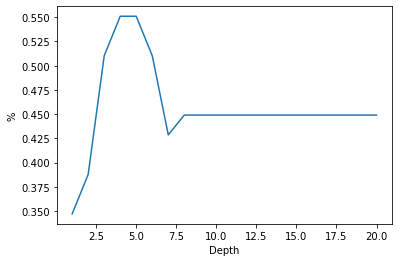

In [9]:
# plot the model
plt.plot(range(1,21), scores)
plt.xlabel('Depth')
plt.ylabel('%')

## Explore on Your Own

- Try to classify something else! Rather than predicting the "Landmass" feature, could predict something like the "Language"?
- Find a subset of features that work better than what we’re currently using. An important note is that a feature that has categorical data won’t work very well as a feature. For example, we don’t want a decision node to split nodes based on whether the value for "Language" is above or below 5.

[0.42857142857142855, 0.5102040816326531, 0.4897959183673469, 0.5102040816326531, 0.5306122448979592, 0.4897959183673469, 0.4897959183673469, 0.46938775510204084, 0.4897959183673469, 0.5102040816326531]


Text(0, 0.5, '%')

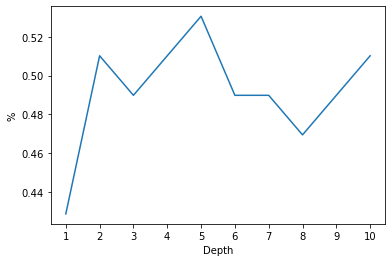

In [10]:
labels = flags['Language']
data = flags[['Landmass', 'Zone', 'Area', 'Population']]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

scores = []
for i in range(1,11):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)
print(scores)
    
plt.plot(range(1,11), scores)
plt.xlabel('Depth')
plt.xticks(range(1,11))
plt.ylabel('%')

- Tune more parameters of the model. You can find a description of all the parameters you can tune in the Decision Tree Classifier documentation. For example, see what happens if you tune max_leaf_nodes. Think about whether you would be overfitting or underfitting the data based on how many leaf nodes you allow.

[0.42857142857142855, 0.5102040816326531, 0.4897959183673469, 0.5102040816326531, 0.4897959183673469, 0.4897959183673469, 0.4897959183673469, 0.4897959183673469, 0.4897959183673469, 0.4897959183673469]


Text(0, 0.5, '%')

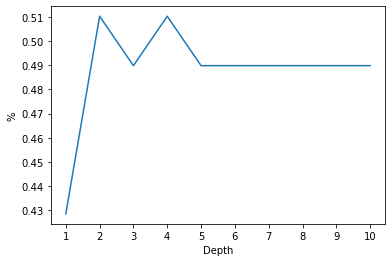

In [11]:
abels = flags['Language']
data = flags[['Landmass', 'Zone', 'Area', 'Population']]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

scores = []
for i in range(1,11):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i, max_leaf_nodes=10) # add max_leaf_nodes
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)
print(scores)
    
plt.plot(range(1,11), scores)
plt.xticks(range(1,11))
plt.xlabel('Depth')
plt.ylabel('%')

the data was overfitting.